**Anastasia Wong - 210007301 - Assignment 2**

Part 6: K-Means - DBSCAN clustering.

As we need to access our Google Drive unit, to get access to the data we previously uploaded, we need to mount our drive. Run the following code to allow this notebook access to your drive.

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
pip install lonboard

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import geopandas as gpd
# This is a super popular library for working with ML and DL algorithms.
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import shapely
import folium
import seaborn as sns
from lonboard import Map, ScatterplotLayer
from lonboard import Map, SolidPolygonLayer



T1 Data Exploration: Load the Chicago parcels dataset using Pandas.

In [11]:
chicago = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/data/Chicago_parcels.shp')

T2: Display the first few rows of the dataset. Investigate the available attributes and their data
types.

In [12]:
chicago.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."


POLY_ID = Polygon ID

ID = Unique ID

AREA  = Area

PIN_OLD = Old 10-digit parcel ID

PIN = 	10-digit parcel ID

geometry = geometry

T3: Create a map to visualize the spatial distribution of tax parcel polygons in Chicago. This is a
dataset with more than a half millions of records, therefore if you use the traditional matplotlib or
pandas you will reach the RAM limit of Colab, you need to use lonboard library and the
SolidPolygonLayer layer to render polygons.

In [13]:
pip install folium

In [14]:
pip install matplotlib

In [15]:
pip install mapclassify

<Axes: >

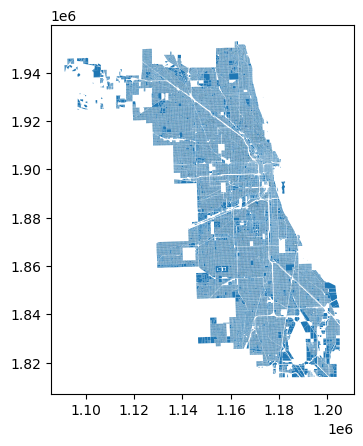

In [16]:
chicago.plot()

T4 Correlation Analysis: Explore correlations between spatial attributes (latitude, longitude)
and numerical attributes. Using the text cell, provide insights into any observed correlations

In [17]:
chicago_gdf = gpd.read_file('/content/Chicago_parcels.shp')
chicago_gdf

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159..."
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452..."
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ..."
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ..."
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082..."
...,...,...,...,...,...,...
592516,592517,588217,0.00,-2147483648,-2147483648,"POLYGON ((1198269.792 1832592.793, 1198394.873..."
592517,592518,588218,0.00,-2147483648,-2147483648,"POLYGON ((1198410.986 1832594.443, 1198534.158..."
592518,592519,588216,0.00,-2147483648,-2147483648,"POLYGON ((1198602.435 1832596.186, 1198724.787..."
592519,592520,588215,0.00,-2147483648,-2147483648,"POLYGON ((1198742.539 1832597.464, 1198864.615..."


In [21]:
#make sure latitude and longitude columns exist
chicago_gdf['longitude'] = chicago_gdf.geometry.centroid.x
chicago_gdf['latitude'] = chicago_gdf.geometry.centroid.y

In [40]:
#check the size of the data we load in memory
chicago_gdf.shape

(592521, 8)

In [46]:
#there are 8 columns in this dataset
chicago_gdf.columns

Index(['POLY_ID', 'ID', 'AREA', 'PIN_OLD', 'PIN', 'geometry', 'longitude',
       'latitude'],
      dtype='object')

In [49]:
# remove null rows in latitude and longitude columns
(chicago_gdf["latitude"].isnull() | chicago_gdf["longitude"].isnull()).mean()

0.0

In [51]:
# try again, mean = 0
chicago_gdf = chicago_gdf[(chicago_gdf["longitude"].notnull() & chicago_gdf["latitude"].notnull())]

In [52]:
chicago_gdf.head()

,POLY_ID,ID,AREA,PIN_OLD,PIN,geometry,longitude,latitude
0,1,93,0.01,836300010,836300010,"POLYGON ((1091182.694 1942890.287, 1091173.159...",1.091780e+06,1.943042e+06
1,2,94,0.00,836300011,836300011,"POLYGON ((1092430.298 1943191.955, 1092463.452...",1.092427e+06,1.943134e+06
2,3,96,0.02,836300013,836300013,"POLYGON ((1092323.996 1942962.61, 1092301.306 ...",1.091688e+06,1.942695e+06
3,4,95,0.01,836300012,836300012,"POLYGON ((1092024.119 1942447.762, 1091997.19 ...",1.091538e+06,1.942343e+06
4,5,92,0.01,836300009,836300009,"POLYGON ((1091970.533 1942338.191, 1091929.082...",1.091543e+06,1.942083e+06


In [55]:
# check boundaries in dataset
chicago_gdf.total_bounds

array([1091173.15922881, 1813913.37750871, 1205119.21461458,
       1952997.78968386])

In [18]:
pip install sns

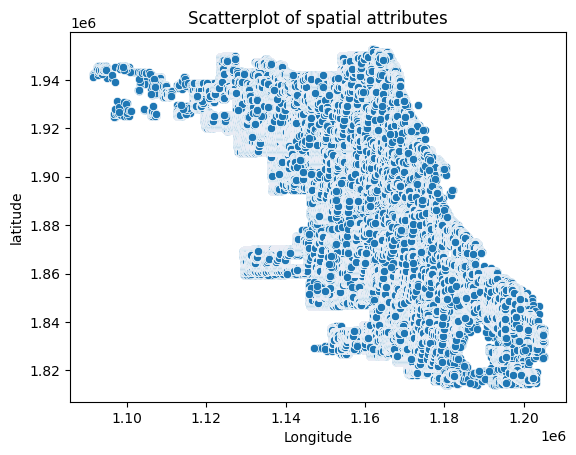

In [22]:
#Scatterplot using latitude and longitude
sns.scatterplot(data=chicago_gdf, x='longitude', y='latitude')
plt.title("Scatterplot of spatial attributes")
plt.xlabel("Longitude")
plt.ylabel("latitude")
plt.show()

As the above scatterplot shows, the points on the map of Chicago are congested. This makes it difficult to understand patterns, trends, and relationships within the geographical datasets. We can therefore use clustering algorithms such as K-means and DBSCAN to uncover meaningful insights.

T5 K-Means Clustering: Implement K-Means clustering with different values of n_clusters.


In [23]:
def initialize_centroids(chicago_gdf, k):
    # Randomly select k data points as initial centroids
    indices = np.random.choice(len(chicago_gdf), k, replace=False)
    centroids = chicago_gdf[indices]
    return(centroids)

In [24]:
def assign_to_clusters(chicago_gdf, centroids):
    # Compute distances from each data point to each centroid, linalg is a popular way to do it, find out more in the numpy documentation.
    distances = np.linalg.norm(chicago_gdf[:, np.newaxis] - centroids, axis=2)

    # Assign each data point to the cluster of the nearest centroid
    clusters = np.argmin(distances, axis=1)
    return clusters

In [25]:
def update_centroids(chicago_gdf, clusters, k):
    # Update centroids based on the mean of data points in each cluster
    centroids = np.array([chicago_gdf[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

In [26]:
def k_means(chicago_gdf, k, max_iterations=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(chicago_gdf, k) #See how I can call a function inside another one.

    for iteration in range(max_iterations):
        # Step 2: Assign data points to clusters
        clusters = assign_to_clusters(chicago_gdf, centroids) # again in here.

        # Step 3: Update centroids
        new_centroids = update_centroids(chicago_gdf, clusters, k)

        # Check for convergence (Again optional but just in case)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids


    return clusters, centroids

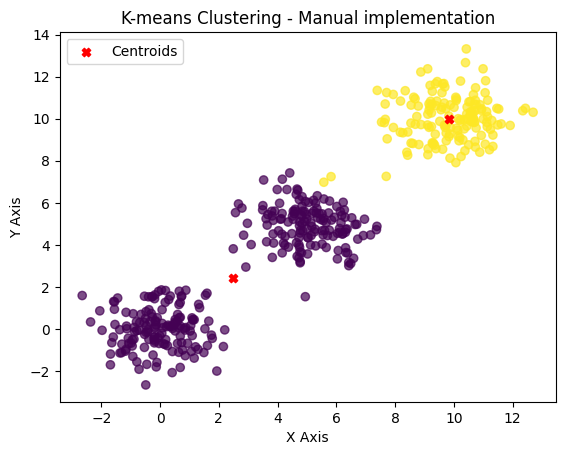

In [157]:
#  T5/T6: Implement K-Means clustering with different values of n_clusters. n=2 + visualisation
np.random.seed(11)
chicago_kmeans = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

# Hint: You could try to check what 'data' includes so you can see the structure of the fake data.

# Run K-means algorithm with k=3
k = 2
clusters, final_centroids = k_means(chicago_kmeans, k)

# Visualize the results in a scattler plot.,
plt.scatter(chicago_kmeans[:, 0], chicago_kmeans[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

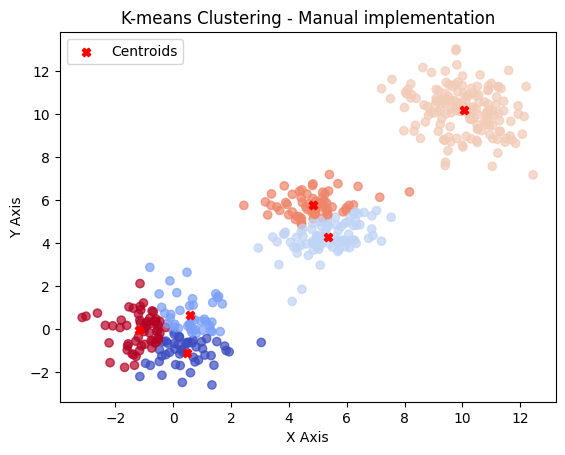

In [156]:
#  T5/T6: Implement K-Means clustering with different values of n_clusters. n=6 + visualisation
np.random.seed(12)
chicago_kmeans = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

# Hint: You could try to check what 'data' includes so you can see the structure of the fake data.

# Run K-means algorithm with k=3
k = 6
clusters, final_centroids = k_means(chicago_kmeans, k)

# Visualize the results in a scattler plot.,
plt.scatter(chicago_kmeans[:, 0], chicago_kmeans[:, 1], c=clusters, cmap='coolwarm', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

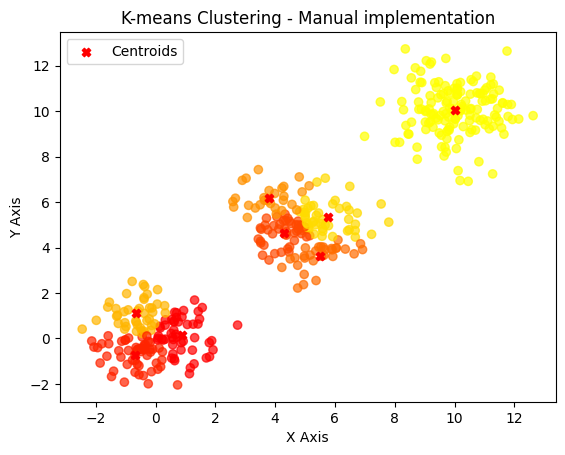

In [155]:
#  T5/T6: Implement K-Means clustering with different values of n_clusters. n=8 + visualisation
np.random.seed(54)
chicago_kmeans = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

# Hint: You could try to check what 'data' includes so you can see the structure of the fake data.

# Run K-means algorithm with k=3
k = 8
clusters, final_centroids = k_means(chicago_kmeans, k)

# Visualize the results in a scattler plot.,
plt.scatter(chicago_kmeans[:, 0], chicago_kmeans[:, 1], c=clusters, cmap='autumn', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

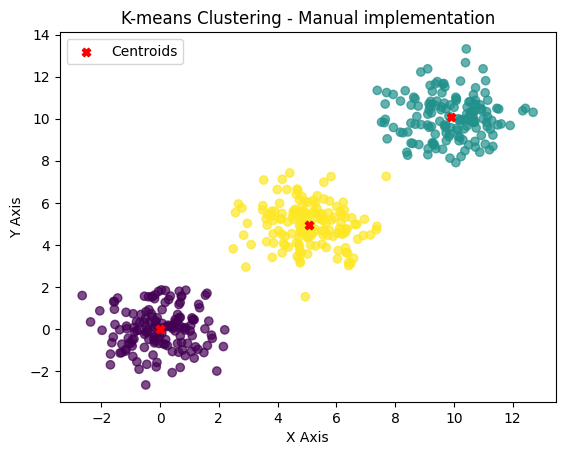

In [154]:
#  T5/T6: Implement K-Means clustering with different values of n_clusters. n=8 +visualisation
np.random.seed(11)
chicago_kmeans = np.concatenate([np.random.normal(loc=0, scale=1, size=(150, 2)),
                       np.random.normal(loc=5, scale=1, size=(150, 2)),
                       np.random.normal(loc=10, scale=1, size=(150, 2))])

# Hint: You could try to check what 'data' includes so you can see the structure of the fake data.

# Run K-means algorithm with k=3
k = 3
clusters, final_centroids = k_means(chicago_kmeans, k)

# Visualize the results in a scattler plot.,
plt.scatter(chicago_kmeans[:, 0], chicago_kmeans[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', label='Centroids')
plt.title('K-means Clustering - Manual implementation')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.show()

T7 Evaluate the clustering results and choose an “optimal” value for n_clusters. Justify your
choice in a markdown cell.

I would say that the "optimal" k value is three as the clusters are clearly seprated by colour. I would say viridis is the most suitable cmap given that the colours are all different, unlike 'autumn' which are too similar.

T8: DBSCAN Clustering: Implement the DBSCAN method. Experiment with different values of
eps and min_samples in DBSCAN ( at least three)


In [90]:
def find_neighbors(chicago_gdf, point_index, epsilon):
    # Find indices of data points within epsilon distance from the given point
    distances = np.linalg.norm(chicago_gdf - chicago_gdf[point_index], axis=1)
    neighbors = np.where(distances <= epsilon)[0]
    return neighbors

In [91]:
def expand_cluster(chicago_gdf, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited):
    # Assign the point to the current cluster
    clusters[point_index] = cluster_id

    # Expand the cluster by iterating over neighbors
    for neighbor_index in neighbors:
        if not visited[neighbor_index]:
            visited[neighbor_index] = True
            new_neighbors = find_neighbors(chicago_gdf, neighbor_index, epsilon)

            # Check if the neighbor has enough neighbors to be a core point
            if len(new_neighbors) >= min_samples:
                neighbors = np.union1d(neighbors, new_neighbors)

        # Assign the neighbor to the current cluster if not assigned to any cluster
        if clusters[neighbor_index] == -1:
            clusters[neighbor_index] = cluster_id

In [92]:
def dbscan(chicago_gdf, epsilon, min_samples):
    # Initialize variables
    num_points = len(chicago_gdf)
    clusters = np.full(num_points, -1)  # -1 represents unassigned points
    visited = np.full(num_points, False)

    # Initialize cluster ID
    cluster_id = 0

    for point_index in range(num_points):
        if not visited[point_index]:
            visited[point_index] = True
            neighbors = find_neighbors(chicago_gdf, point_index, epsilon)

            # Check if the point is a core point
            if len(neighbors) >= min_samples:
                expand_cluster(chicago_gdf, point_index, neighbors, cluster_id, epsilon, min_samples, clusters, visited)
                cluster_id += 1

    return clusters

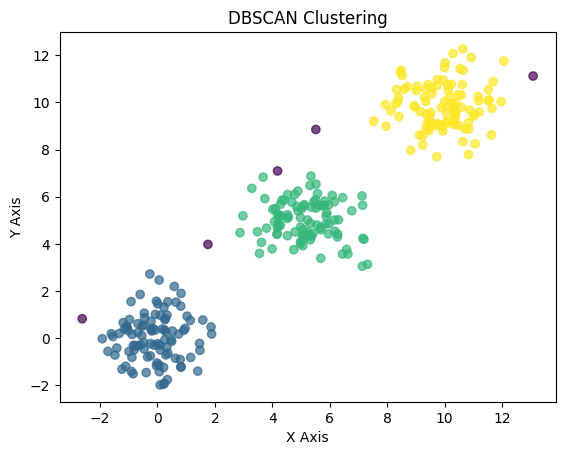

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate synthetic data
np.random.seed(42)
chicago_gdf = np.concatenate([
    np.random.normal(loc=0, scale=1, size=(100, 2)),
    np.random.normal(loc=5, scale=1, size=(100, 2)),
    np.random.normal(loc=10, scale=1, size=(100, 2))
])

# Run DBSCAN algorithm with specified epsilon and min_samples
epsilon = 1
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(chicago_gdf)

# Visualize the results
plt.scatter(chicago_gdf[:, 0], chicago_gdf[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

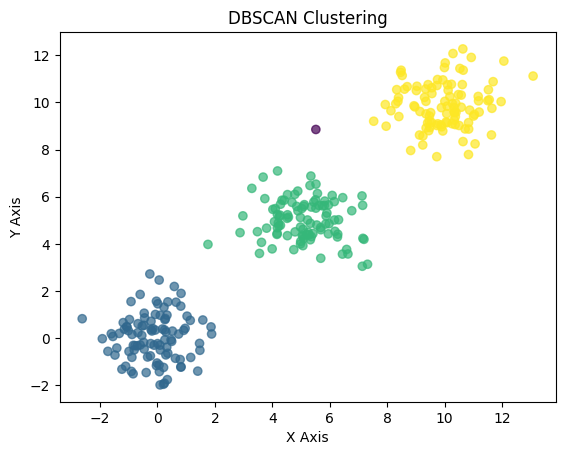

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate synthetic data
np.random.seed(42)
chicago_gdf = np.concatenate([
    np.random.normal(loc=0, scale=1, size=(100, 2)),
    np.random.normal(loc=5, scale=1, size=(100, 2)),
    np.random.normal(loc=10, scale=1, size=(100, 2))
])

# Run DBSCAN algorithm with specified epsilon and min_samples
epsilon = 1.5
min_samples = 8
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(chicago_gdf)

# Visualize the results
plt.scatter(chicago_gdf[:, 0], chicago_gdf[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

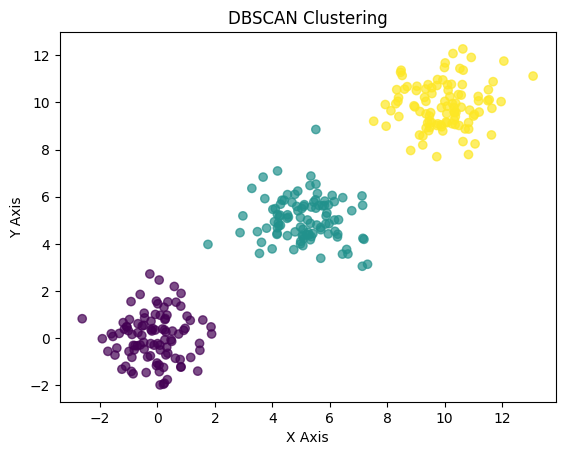

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Generate synthetic data
np.random.seed(42)
chicago_gdf = np.concatenate([
    np.random.normal(loc=0, scale=1, size=(100, 2)),
    np.random.normal(loc=5, scale=1, size=(100, 2)),
    np.random.normal(loc=10, scale=1, size=(100, 2))
])

# Run DBSCAN algorithm with specified epsilon and min_samples
epsilon = 2
min_samples = 2
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(chicago_gdf)

# Visualize the results
plt.scatter(chicago_gdf[:, 0], chicago_gdf[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()


T9: Plot the clustering results for each combination of parameters. Therefore, you should create
a plot matrix 3*3 ( min_samples and eps)

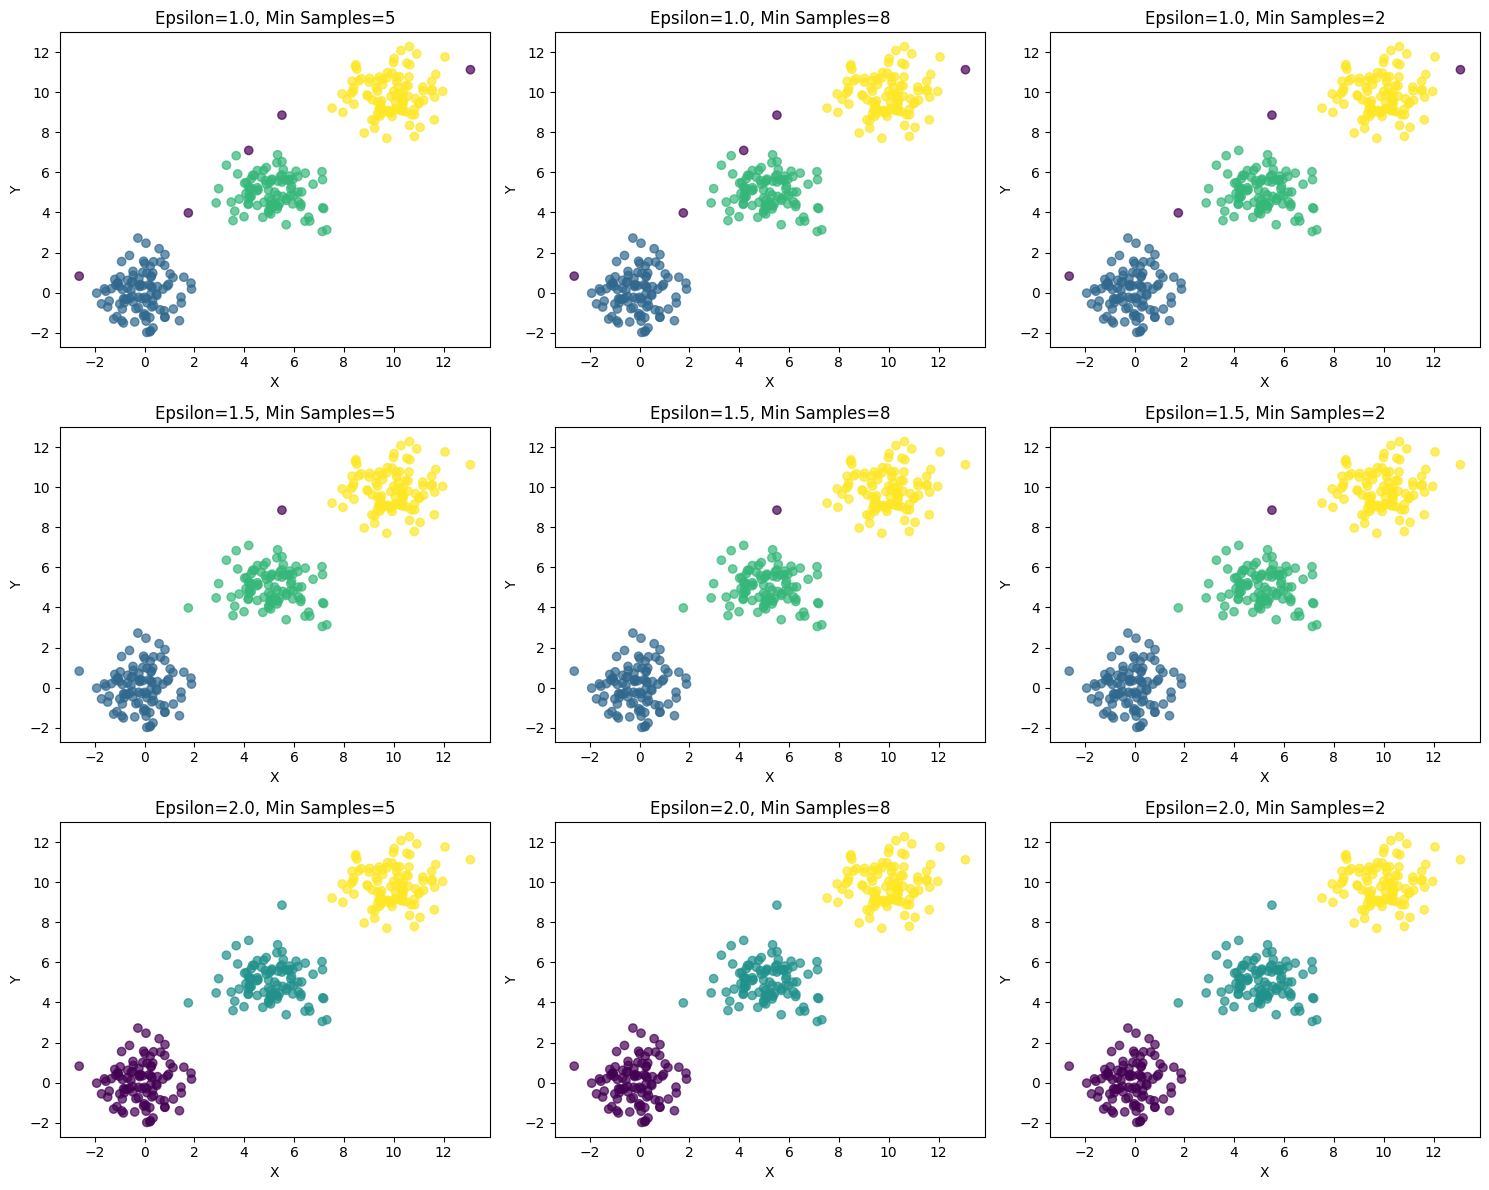

In [137]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize DBSCAN parameters
def visualize_dbscan_parameters(chicago_gdf, epsilon_values, min_samples_values):
    fig, axes = plt.subplots(len(epsilon_values), len(min_samples_values), figsize=(15, 12))

    # Extract longitude and latitude
    coords = chicago_gdf[:, [0, 1]]  # Adjust indices based on column order

    for i, epsilon in enumerate(epsilon_values):
        for j, min_samples in enumerate(min_samples_values):
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            clusters_result = dbscan.fit_predict(coords)

            # Plot the clusters
            scatter = axes[i, j].scatter(
                coords[:, 0], coords[:, 1],
                c=clusters_result, cmap='viridis', alpha=0.7
            )
            axes[i, j].set_title(f'Epsilon={epsilon}, Min Samples={min_samples}')
            axes[i, j].set_xlabel('X')
            axes[i, j].set_ylabel('Y')



    plt.tight_layout()
    plt.show()

# Example usage
epsilon_values = [1.0, 1.5, 2.0]
min_samples_values = [5, 8, 2]

# Visualize DBSCAN parameters
visualize_dbscan_parameters(chicago_gdf, epsilon_values, min_samples_values)


Visualisation of optimal k-means map (T6) and DBSCANS map

T10: Using a text cell write your insights about the impact of modifying the eps and min_samples parameters, and finally recommend suitable values for eps and min_samples based on your analysis. Note: Consider the real-world implications of your findings, especially in the context of
urban planning or data-driven decision-making

It is recommended to use larger min_samples for large and noisy data sets, and to adjust eps (epsilon) depending on whether you get too large clusters (decrease epsilon) or too much noise (increase epsilon).

epsilon: Maximum distance to consider for neighbors.

min_samples: Minimum number of neighbors to consider a point a core point.

For my DBSCAN experimentation, I found that having an epsilon of value '2' and min_samples '8' was the most beneficial in terms of how the plots were spatially clustered